In [1]:
import os
import librosa
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Labelling the Dataset

In [ ]:
import IPython.display as ipd

def play_audio(file_path, rate=None):
    """
    Play audio file.

    Parameters:
    file_path (str): Path to the audio file.
    rate (int, optional): Sampling rate of the audio file. If None, the default rate will be used.

    Returns:
    IPython.display.Audio: Audio widget for playback.
    """
    audio_widget = ipd.Audio(file_path, rate=rate)
    ipd.display(audio_widget)
    return audio_widget

# Example usage:
audio_file_path = '/content/drive/MyDrive/Dataset/pertussis/Pertussis2.wav'
play_audio(audio_file_path, rate=7000)


In [ ]:
import os
import librosa
max_amplitude = 0.5
def import_dataset(dataset_path):
    dataset = []
    labels = []
    class_mapping = {'bronchitis': 0, 'pertussis': 1, 'asthma': 2,'pneumonia':3}  # Mapping folder names to illness labels

    for folder_name, label in class_mapping.items():
        # Path to the folder containing audio files for each illness
        folder_path = os.path.join(dataset_path, folder_name)

        # Iterate through each audio file in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith('.wav'):  # Assuming audio files are in .wav format
                file_path = os.path.join(folder_path, filename)

                # Load audio file using librosa
                audio_data, _ = librosa.load(file_path, sr=None)  # sr=None to keep original sampling rate

                # Normalize audio data to ensure consistent volume levels
                audio_data /= np.max(np.abs(audio_data))
                audio_data *= max_amplitude

                dataset.append(audio_data)
                labels.append(label)  # Assigning the illness label

    return dataset, labels

# Example usage:
dataset_path = '/content/drive/MyDrive/Dataset'
dataset, labels = import_dataset(dataset_path)

print("Number of audio files imported:", len(dataset))
print("Labels:", labels)


Number of audio files imported: 301
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


#Plotting waveforms and Spectograms


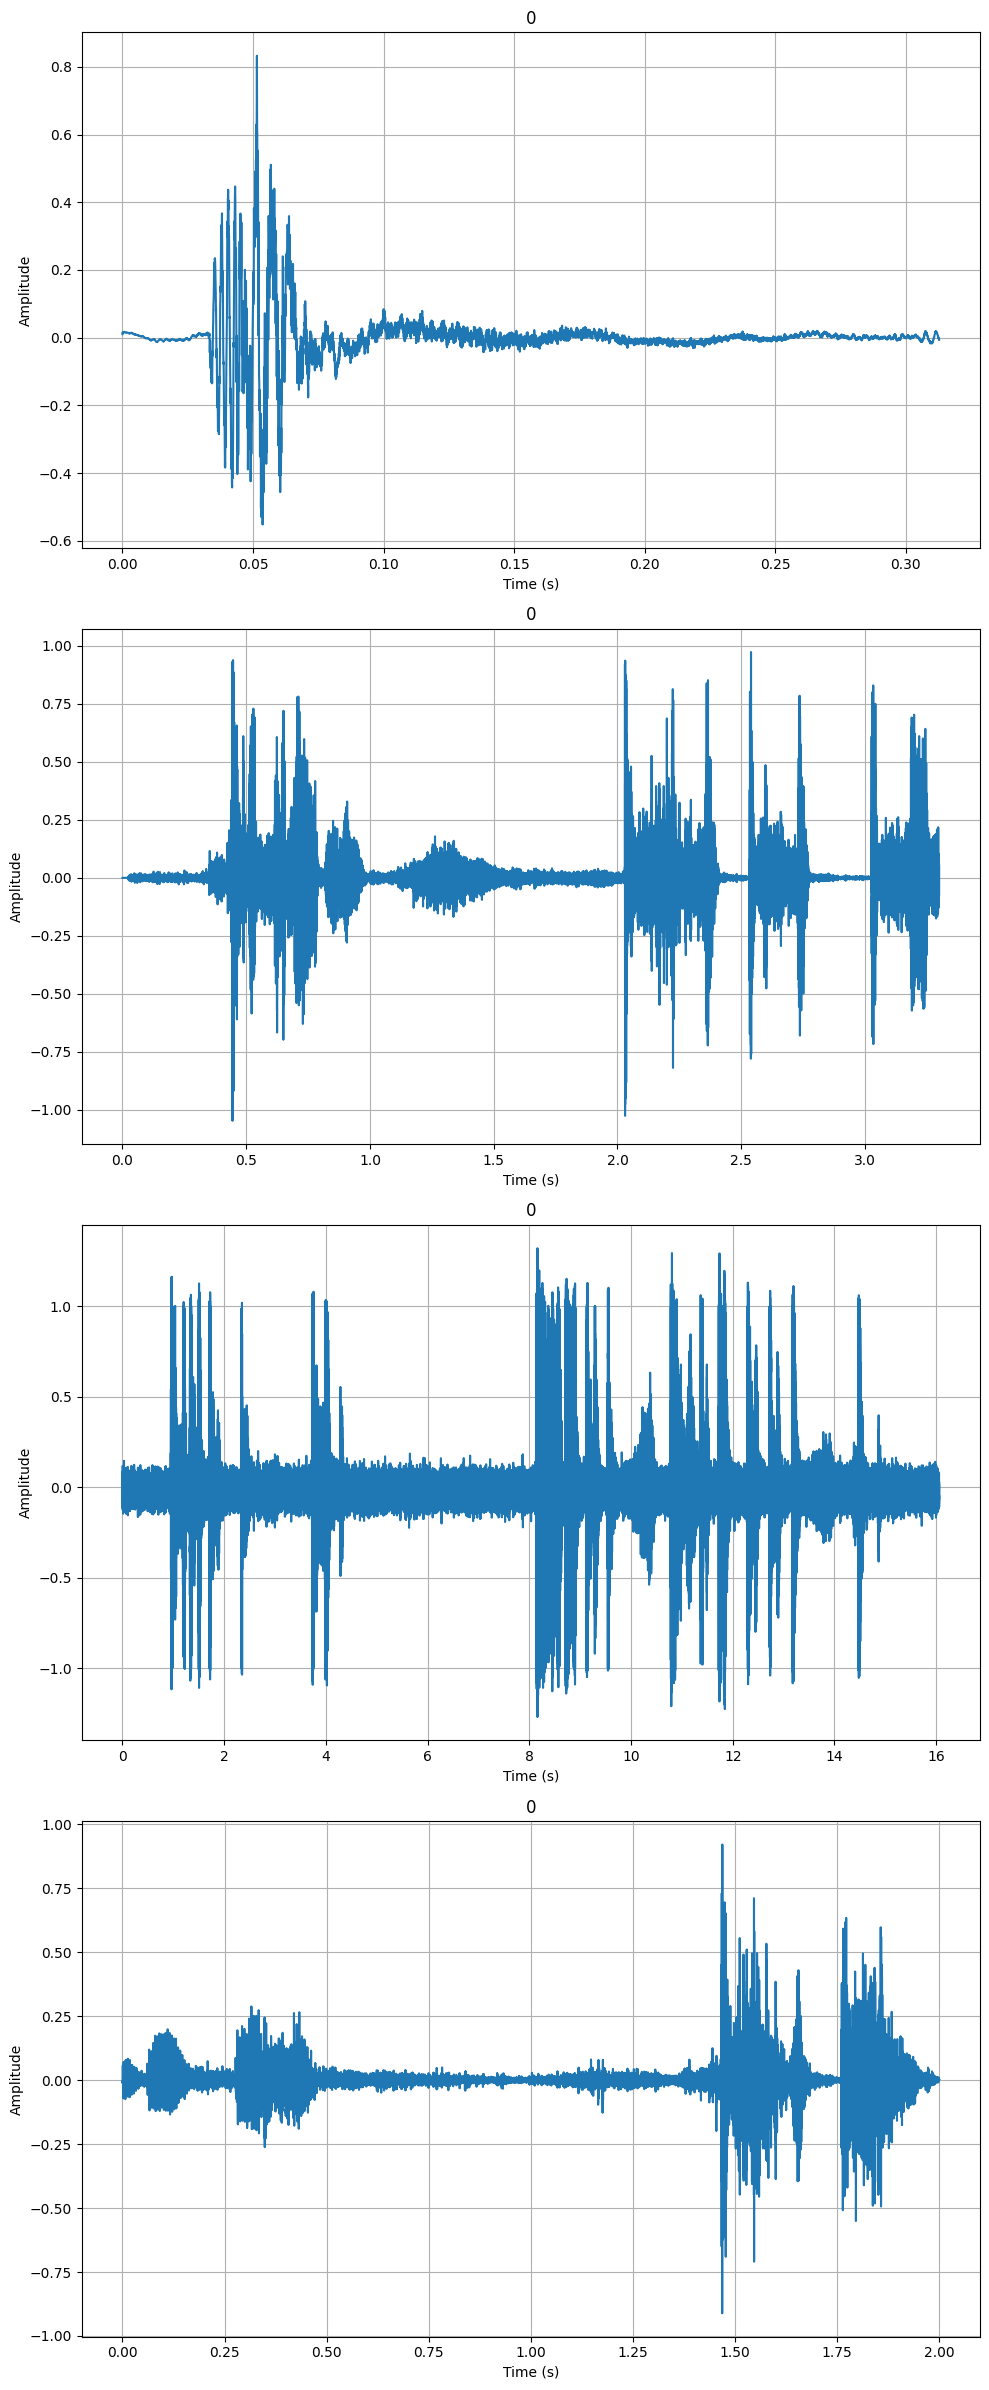

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

def plot_audio_waveform(file_paths, labels):
    fig, axs = plt.subplots(len(file_paths), 1, figsize=(10, 6 * len(file_paths)))

    for i, file_path in enumerate(file_paths):
        y, sr = librosa.load(file_path)
        duration = librosa.get_duration(y=y, sr=sr)
        time = np.linspace(0, duration, len(y))

        axs[i].plot(time, y)
        axs[i].set(xlabel='Time (s)', ylabel='Amplitude', title=labels[i])
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()


# List of your audio files
audio_files = ['/content/drive/MyDrive/Dataset/asthma/dry_172.wav',
               '/content/drive/MyDrive/Dataset/bronchitis/AnyConv.com__B44.wav',
               '/content/drive/MyDrive/Dataset/pertussis/Pertussis1.wav',
               '/content/drive/MyDrive/Dataset/pneumonia/AnyConv.com__P12.wav']
titles = ['Asthma', 'Bronchitis', 'Pertussis', 'Pneumonia']

plot_audio_waveform(audio_files, labels)


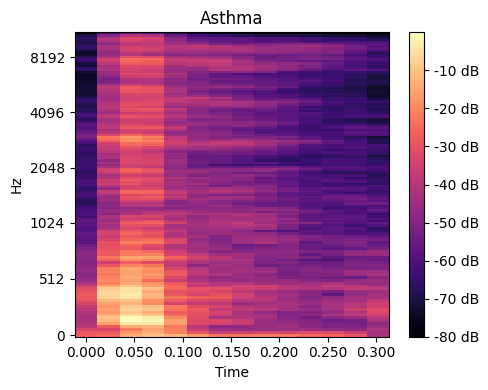

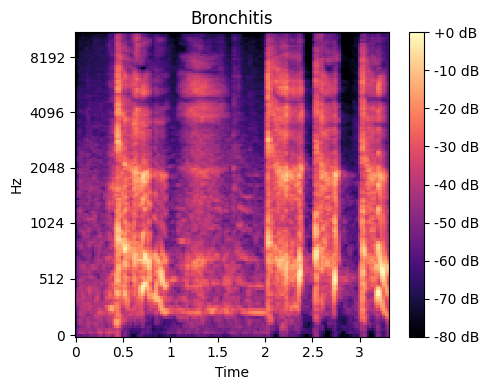

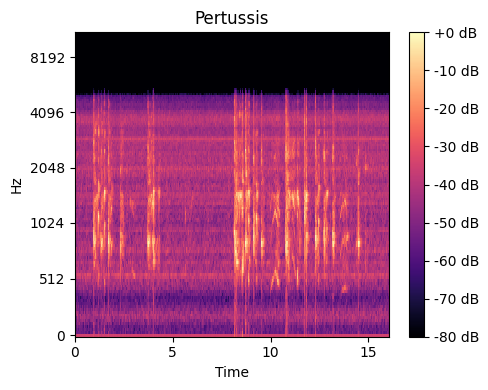

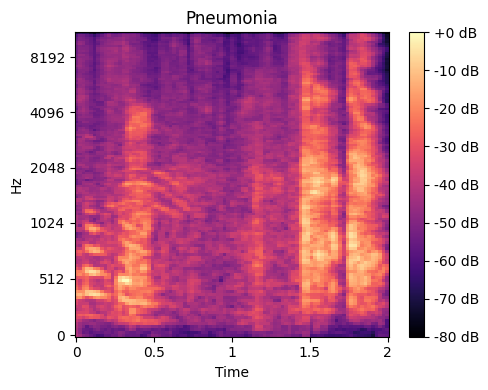

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_spectrogram(audio_file, title):
    # Load the audio file
    y, sr = librosa.load(audio_file)

    # Compute the spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr)

    # Plot the spectrogram
    plt.figure(figsize=(5, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

# List of your audio files
audio_files = ['/content/drive/MyDrive/Dataset/asthma/dry_172.wav',
               '/content/drive/MyDrive/Dataset/bronchitis/AnyConv.com__B44.wav',
               '/content/drive/MyDrive/Dataset/pertussis/Pertussis1.wav',
               '/content/drive/MyDrive/Dataset/pneumonia/AnyConv.com__P12.wav']
titles = ['Asthma', 'Bronchitis', 'Pertussis', 'Pneumonia']

# Plot the spectrograms for each audio file
for audio_file, title in zip(audio_files, titles):
    plot_spectrogram(audio_file, title)


In [ ]:
def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

def stretch1(data,rate=0.8):
    data = librosa.effects.time_stretch(data,rate=0.8)
    return data

def stretch2(data,rate=1.2):
    data = librosa.effects.time_stretch(data,rate=1.2)
    return data

def pitch_shift(data , rate):
    data = librosa.effects.pitch_shift(data, sr=220250, n_steps=rate)
    return data

In [ ]:
import librosa
import matplotlib.pyplot as plt

def show_audio(audio_path):
    # Load the original audio
    y, sr = librosa.load(audio_path)

    # Apply various transformations
    y_noise = add_noise(y, 0.01)
    y_shift = shift(y, 3200)
    y_stretch_1 = stretch1(y)
    y_stretch_2 = stretch2(y)
    y_pitch_shift = pitch_shift(y, 3)

    # Plot the original and transformed audio waveforms
    plt.figure(figsize=(20, 8))

    plt.subplot(3, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Original')

    plt.subplot(3, 2, 2)
    librosa.display.waveshow(y_noise, sr=sr)
    plt.title('Noise')

    plt.subplot(3, 2, 3)
    librosa.display.waveshow(y_shift, sr=sr)
    plt.title('Shift')

    plt.subplot(3, 2, 4)
    librosa.display.waveshow(y_stretch_1, sr=sr)
    plt.title('Stretch 1')

    plt.subplot(3, 2, 5)
    librosa.display.waveshow(y_stretch_2, sr=sr)
    plt.title('Stretch 2')

    plt.subplot(3, 2, 6)
    librosa.display.waveshow(y_pitch_shift, sr=sr)
    plt.title('Pitch Shift')

    plt.tight_layout()
    plt.show()


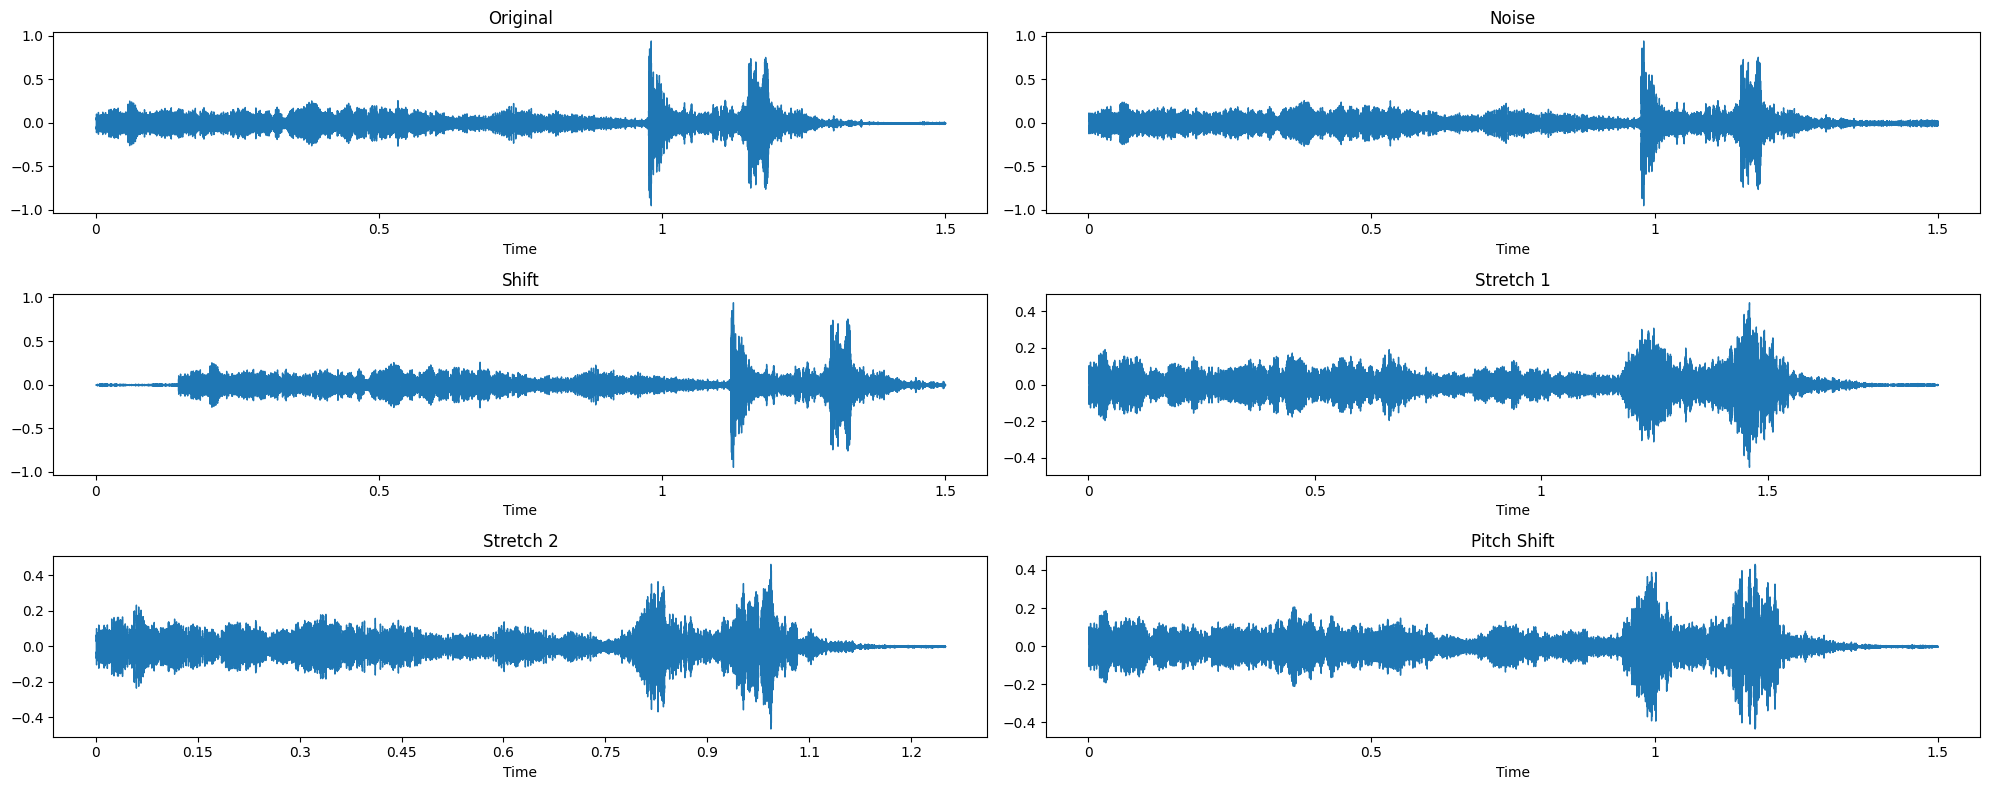

In [ ]:
show_audio("/content/drive/MyDrive/Dataset/bronchitis/AnyConv.com__B42.wav")

#Data Augmentation


In [ ]:
import os
import shutil

# Define the source directories for the original data
bronchitis_data_dir = '/content/drive/MyDrive/Dataset/bronchitis'
pertussis_data_dir = '/content/drive/MyDrive/Dataset/pertussis'
asthma_data_dir = '/content/drive/MyDrive/Dataset/asthma'
pneumonia_data_dir = '/content/drive/MyDrive/Dataset/pneumonia'

# Define the destination directories for the duplicated data
duplicated_bronchitis_dir = '/content/drive/MyDrive/Dataset/bronchitis_duplicated'
duplicated_pertussis_dir = '/content/drive/MyDrive/Dataset/pertussis_duplicated'
duplicated_asthma_dir = '/content/drive/MyDrive/Dataset/asthma_duplicated'
duplicated_pneumonia_dir = '/content/drive/MyDrive/Dataset/pneumonia_duplicated'

# Create the duplicated data directories if they don't exist
os.makedirs(duplicated_bronchitis_dir, exist_ok=True)
os.makedirs(duplicated_pertussis_dir, exist_ok=True)
os.makedirs(duplicated_asthma_dir, exist_ok=True)
os.makedirs(duplicated_pneumonia_dir, exist_ok=True)

# Duplicate the audio files from the original directories to the duplicated directories
for filename in os.listdir(bronchitis_data_dir):
    # Construct the full path for the original and duplicated files
    original_file_path = os.path.join(bronchitis_data_dir, filename)
    duplicated_file_path = os.path.join(duplicated_bronchitis_dir, filename)

    # Copy the file to the duplicated directory
    shutil.copyfile(original_file_path, duplicated_file_path)

for filename in os.listdir(pertussis_data_dir):
    # Construct the full path for the original and duplicated files
    original_file_path = os.path.join(pertussis_data_dir, filename)
    duplicated_file_path = os.path.join(duplicated_pertussis_dir, filename)

    # Copy the file to the duplicated directory
    shutil.copyfile(original_file_path, duplicated_file_path)

for filename in os.listdir(asthma_data_dir):
    # Construct the full path for the original and duplicated files
    original_file_path = os.path.join(asthma_data_dir, filename)
    duplicated_file_path = os.path.join(duplicated_asthma_dir, filename)

    # Copy the file to the duplicated directory
    shutil.copyfile(original_file_path, duplicated_file_path)

for filename in os.listdir(pneumonia_data_dir):
    # Construct the full path for the original and duplicated files
    original_file_path = os.path.join(pneumonia_data_dir, filename)
    duplicated_file_path = os.path.join(duplicated_pneumonia_dir, filename)

    # Copy the file to the duplicated directory
    shutil.copyfile(original_file_path, duplicated_file_path)


In [ ]:
import os
import shutil
import numpy as np
import librosa
import soundfile as sf

# Define the source directories for the original data
bronchitis_data_dir = '/content/drive/MyDrive/Dataset/bronchitis'
pertussis_data_dir = '/content/drive/MyDrive/Dataset/pertussis'
asthma_data_dir = '/content/drive/MyDrive/Dataset/asthma'
pneumonia_data_dir = '/content/drive/MyDrive/Dataset/pneumonia'

# Define the destination directories for the duplicated data
duplicated_bronchitis_dir = '/content/drive/MyDrive/Dataset/bronchitis_duplicated/'
duplicated_pertussis_dir = '/content/drive/MyDrive/Dataset/pertussis_duplicated/'
duplicated_asthma_dir = '/content/drive/MyDrive/Dataset/asthma_duplicated/'
duplicated_pneumonia_dir = '/content/drive/MyDrive/Dataset/pneumonia_duplicated/'


def augment_data(src_dir, dest_dir):
    for filename in os.listdir(src_dir):
        if filename.endswith('.wav'):
            try:
                # Load audio file
                audio_path = os.path.join(src_dir, filename)
                data, sr = librosa.load(audio_path, sr=None)

                # Add noise
                noise_factor = 0.01
                noise = np.random.randn(len(data))
                augmented_data = data + noise_factor * noise

                # Save augmented audio
                augmented_filename = os.path.join(dest_dir, 'augmented_' + filename)
                sf.write(augmented_filename, augmented_data, sr, subtype='PCM_24')

                # Shift
                shift_samples = 1600
                augmented_data = np.roll(data, shift_samples)

                # Save shifted audio
                shifted_filename = os.path.join(dest_dir, 'shifted_' + filename)
                sf.write(shifted_filename, augmented_data, sr, subtype='PCM_24')

                # Stretch1
                stretched_data = librosa.effects.time_stretch(data, rate=0.8)

                # Save stretched audio
                stretched_filename = os.path.join(dest_dir, 'stretched1_' + filename)
                sf.write(stretched_filename, stretched_data, sr, subtype='PCM_24')

                # Stretch2
                stretched_data = librosa.effects.time_stretch(data, rate=1.2)

                # Save stretched audio
                stretched_filename = os.path.join(dest_dir, 'stretched2_' + filename)
                sf.write(stretched_filename, stretched_data, sr, subtype='PCM_24')
            except Exception as e:
                print(f"Error processing {filename}: {e}")

# Augment data for each disease
augment_data(bronchitis_data_dir, duplicated_bronchitis_dir)
augment_data(pertussis_data_dir, duplicated_pertussis_dir)
augment_data(asthma_data_dir, duplicated_asthma_dir)
augment_data(pneumonia_data_dir, duplicated_pneumonia_dir)


In [ ]:
import os

def count_files(directory):
    count = 0
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):
            count += 1
    return count

# Count files in each original dataset
original_counts = {
    'Bronchitis': count_files(bronchitis_data_dir),
    'Pertussis': count_files(pertussis_data_dir),
    'Asthma': count_files(asthma_data_dir),
    'Pneumonia': count_files(pneumonia_data_dir)
}

# Count files in each augmented dataset
augmented_counts = {
    'Bronchitis': count_files(duplicated_bronchitis_dir),
    'Pertussis': count_files(duplicated_pertussis_dir),
    'Asthma': count_files(duplicated_asthma_dir),
    'Pneumonia': count_files(duplicated_pneumonia_dir)
}

# Print counts
print("Original Dataset Counts:")
for disease, count in original_counts.items():
    print(f"{disease}: {count}")

print("\nAugmented Dataset Counts:")
for disease, count in augmented_counts.items():
    print(f"{disease}: {count}")


Original Dataset Counts:
Bronchitis: 92
Pertussis: 9
Asthma: 110
Pneumonia: 80

Augmented Dataset Counts:
Bronchitis: 460
Pertussis: 45
Asthma: 550
Pneumonia: 400


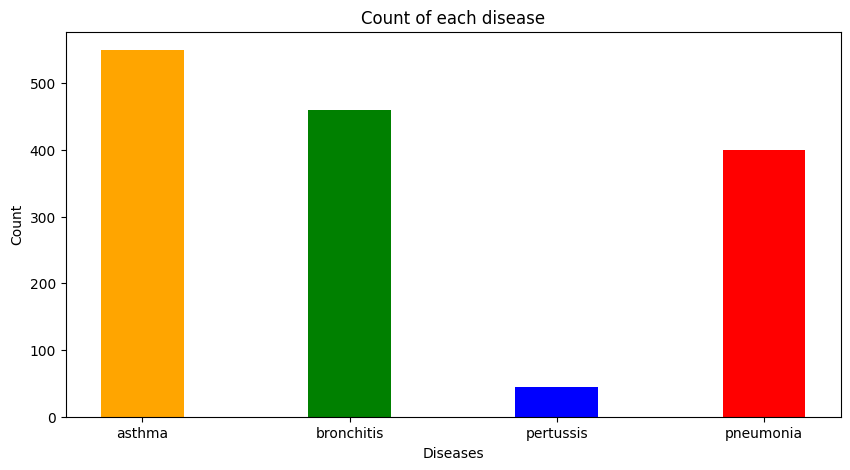

{'asthma': 550, 'bronchitis': 460, 'pertussis': 45, 'pneumonia': 400}


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

def augmented_labels_count(labels):
    unique, counts = np.unique(labels, return_counts=True)
    data_count = dict(zip(unique, counts))

    courses = list(data_count.keys())
    values = list(data_count.values())

    fig = plt.figure(figsize=(10, 5))

    # creating the bar plot
    plt.bar(courses, values, color=['orange', 'green', 'blue', 'red'],
            width=0.4)

    plt.xlabel("Diseases")
    plt.ylabel("Count")
    plt.title("Count of each disease")
    plt.show()

    print(data_count)

# Load the augmented dataset labels
augmented_bronchitis_labels = ['bronchitis'] * len(os.listdir(duplicated_bronchitis_dir))
augmented_pertussis_labels = ['pertussis'] * len(os.listdir(duplicated_pertussis_dir))
augmented_asthma_labels = ['asthma'] * len(os.listdir(duplicated_asthma_dir))
augmented_pneumonia_labels = ['pneumonia'] * len(os.listdir(duplicated_pneumonia_dir))

# Combine all the augmented labels
all_labels = (
    augmented_bronchitis_labels +
    augmented_pertussis_labels +
    augmented_asthma_labels +
    augmented_pneumonia_labels
)

# Call the function to plot and print the counts of each disease
augmented_labels_count(all_labels)


#Adding Label to the Augmented data and Padding

In [ ]:
import os
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define directories for the augmented data
augmented_bronchitis_dir = '/content/drive/MyDrive/Dataset/bronchitis_duplicated'
augmented_pertussis_dir = '/content/drive/MyDrive/Dataset/pertussis_duplicated'
augmented_asthma_dir = '/content/drive/MyDrive/Dataset/asthma_duplicated'
augmented_pneumonia_dir = '/content/drive/MyDrive/Dataset/pneumonia_duplicated'

# Function to extract MFCC features from audio file
def extract_mfcc(audio_path, n_mfcc=20, hop_length=512, n_fft=2048):
    audio, sr = librosa.load(audio_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc, hop_length=hop_length, n_fft=n_fft)
    return mfccs.T

# Function to process data, extract MFCC features, apply padding, and split into train, validation, and test sets
from tqdm import tqdm  # For progress monitoring

def process_data(augmented_directories, output_dir, test_size=0.1, val_size=0.1, batch_size=16):
    os.makedirs(output_dir, exist_ok=True)
    label_mapping = {'bronchitis': 0, 'pertussis': 1, 'asthma': 2, 'pneumonia': 3}
    mfcc_features = []
    labels = []

    for disease_dir in augmented_directories:
        disease_label = os.path.basename(disease_dir).split('_')[0]
        filenames = [f for f in os.listdir(disease_dir) if f.endswith('.wav')]
        num_batches = len(filenames) // batch_size + 1

        for batch_idx in tqdm(range(num_batches), desc=f"Processing {disease_label} files"):
            batch_filenames = filenames[batch_idx * batch_size : (batch_idx + 1) * batch_size]

            for filename in batch_filenames:
                try:
                    audio_path = os.path.join(disease_dir, filename)

                    # Extract MFCC features
                    mfcc = extract_mfcc(audio_path)
                    mfcc_features.append(mfcc)
                    labels.append(label_mapping[disease_label])

                except Exception as e:
                    print(f"Error processing {filename}: {e}")
                    continue  # Skip to the next file if an error occurs

    # Padding
    max_length = max(len(seq) for seq in mfcc_features)
    padded_sequences = pad_sequences(mfcc_features, maxlen=max_length, padding='post', dtype='float32')

    # Convert lists to numpy arrays
    X = np.array(padded_sequences)
    y = np.array(labels)

    # Split data into train, validation, and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size/(1-test_size), random_state=42)

    # Save train, validation, and test sets as .npy files
    np.save(os.path.join(output_dir, 'X_train.npy'), X_train)
    np.save(os.path.join(output_dir, 'y_train.npy'), y_train)
    np.save(os.path.join(output_dir, 'X_val.npy'), X_val)
    np.save(os.path.join(output_dir, 'y_val.npy'), y_val)
    np.save(os.path.join(output_dir, 'X_test.npy'), X_test)
    np.save(os.path.join(output_dir, 'y_test.npy'), y_test)

# Define the output directory for MFCC features
output_dir = '/content/drive/MyDrive/MFCC_features_augmented'

# Process data
augmented_directories = [augmented_bronchitis_dir, augmented_pertussis_dir, augmented_asthma_dir,
                         augmented_pneumonia_dir]
process_data(augmented_directories, output_dir)


Processing pneumonia files: 100%|██████████| 26/26 [00:20<00:00,  1.29it/s]


In [ ]:
# Choose one file to extract MFCC from
sample_file = os.path.join(augmented_bronchitis_dir, os.listdir(augmented_bronchitis_dir)[0])

# Extract MFCC features from the chosen file
mfcc = extract_mfcc(sample_file)

# Print the shape of the MFCC matrix
print("Shape of MFCC matrix:", mfcc.shape)

# Print the first MFCC coefficients
print("First MFCC coefficients:")
print(mfcc)


Shape of MFCC matrix: (324, 20)
First MFCC coefficients:
[[-174.96089    140.35881    -55.60685   ...    9.038343    -6.7767296
   -17.181875 ]
 [-157.38231    137.00291    -58.78016   ...    1.2818702  -14.793776
   -18.222996 ]
 [-175.01117    135.45667    -50.106133  ...   -1.4117677  -15.451136
   -21.331131 ]
 ...
 [-375.4761     165.60446      1.5471606 ...   -3.7480583   -7.03135
    -2.0254717]
 [-384.26718    163.01688      5.852626  ...   -1.3753734   -1.2573364
    -2.2970908]
 [-395.99802    150.27942      3.0312314 ...   -0.6050383    2.1839905
     2.6551237]]


In [3]:
import numpy as np
import os

# Define paths to the directory containing the .npy files
data_dir = '/content/drive/MyDrive/MFCC/MFCC_features_augmented'


# Load train, validation, and test sets
X_train = np.load(os.path.join(data_dir, 'X_train.npy'))
y_train = np.load(os.path.join(data_dir, 'y_train.npy'))
X_val = np.load(os.path.join(data_dir, 'X_val.npy'))
y_val = np.load(os.path.join(data_dir, 'y_val.npy'))
X_test = np.load(os.path.join(data_dir, 'X_test.npy'))
y_test = np.load(os.path.join(data_dir, 'y_test.npy'))

# Check the shapes of the loaded arrays
print("Shapes of loaded arrays:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Shapes of loaded arrays:
X_train: (1163, 19823, 20)
y_train: (1163,)
X_val: (146, 19823, 20)
y_val: (146,)
X_test: (146, 19823, 20)
y_test: (146,)


In [4]:
# Define input shape and number of classes
input_shape = X_train.shape[1:]  # Shape of one input sample
num_classes = len(np.unique(y_train))  # Number of unique classes
print(input_shape)
print(num_classes)

(19823, 20)
4


In [5]:
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]


#Creating a CNN MODEL

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

# Define input shape and number of classes
input_shape = (X_train.shape[1], X_train.shape[2], 1)  # Shape of one MFCC feature with a single channel
num_classes = 4  # Number of disease classes

def create_cnn_model_v2(input_shape, num_classes, dropout_rate=0.5, l2_reg=0.001):
    model = Sequential([
        Reshape(input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    return model

# Create the CNN model with updated architecture
model = create_cnn_model_v2(input_shape, num_classes, dropout_rate=0.5, l2_reg=0.001)

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Build the model
model.build(input_shape=(None, *input_shape))

# Display model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 19823, 20, 1)      0         
                                                                 
 conv2d (Conv2D)             (None, 19821, 18, 32)     320       
                                                                 
 conv2d_1 (Conv2D)           (None, 19819, 16, 32)     9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 9909, 8, 32)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 9907, 6, 64)       18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9905, 4, 64)       36928     
                                                        

In [7]:
# Train the model
history = model.fit(X_train, y_train,
                    batch_size=32,  # Increasing batch size for faster training
                    epochs=15,  # Increasing epochs for longer training
                    validation_data=(X_val, y_val),
                    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])


Epoch 1/15
37/37 [==============================] - 57s 911ms/step - loss: 2.1227 - accuracy: 0.6320 - val_loss: 1.1982 - val_accuracy: 0.7534
Epoch 2/15
37/37 [==============================] - 21s 560ms/step - loss: 1.1677 - accuracy: 0.7291 - val_loss: 0.9837 - val_accuracy: 0.7808
Epoch 3/15
37/37 [==============================] - 21s 567ms/step - loss: 1.0176 - accuracy: 0.7747 - val_loss: 0.9743 - val_accuracy: 0.8014
Epoch 4/15
37/37 [==============================] - 21s 571ms/step - loss: 0.9228 - accuracy: 0.7997 - val_loss: 0.8706 - val_accuracy: 0.8356
Epoch 5/15
37/37 [==============================] - 21s 574ms/step - loss: 0.8054 - accuracy: 0.8323 - val_loss: 0.8133 - val_accuracy: 0.8219
Epoch 6/15
37/37 [==============================] - 20s 553ms/step - loss: 0.7386 - accuracy: 0.8530 - val_loss: 0.7400 - val_accuracy: 0.8630
Epoch 7/15
37/37 [==============================] - 21s 562ms/step - loss: 0.6568 - accuracy: 0.8650 - val_loss: 0.7363 - val_accuracy: 0.8356

In [8]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)


5/5 [==============================] - 1s 101ms/step - loss: 0.7273 - accuracy: 0.8493
Validation Loss: 0.727345883846283
Validation Accuracy: 0.8493150472640991


In [9]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


5/5 [==============================] - 1s 110ms/step - loss: 0.6449 - accuracy: 0.8425
Test Loss: 0.6449029445648193
Test Accuracy: 0.8424657583236694


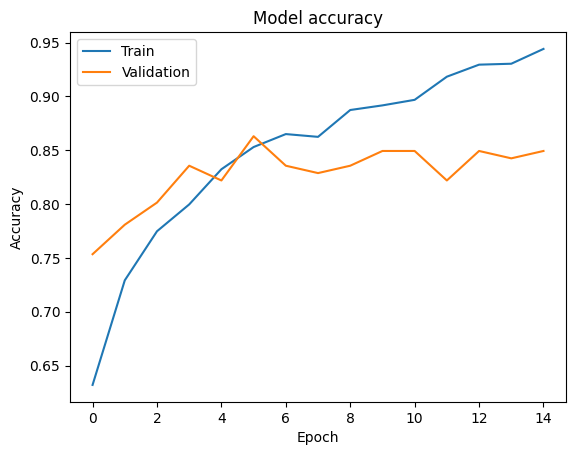

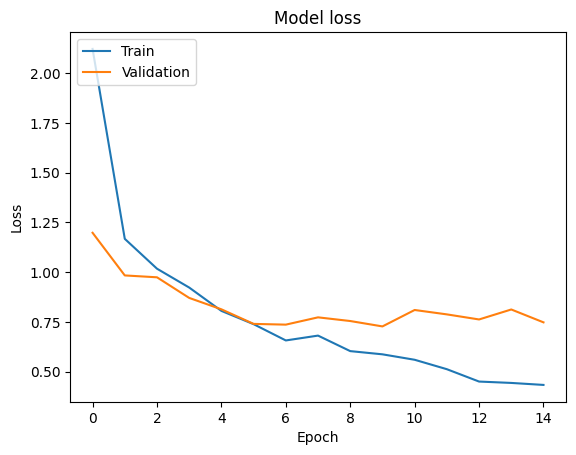

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [30]:
# Define the path where you want to save the model
model_path = '/content/drive/My Drive/my_model.h5'

# Save the model
model.save(model_path)

print("Model saved successfully at:", model_path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully at: /content/drive/My Drive/my_model.h5


In [23]:
import random

# Select a random index from the test data
random_index = random.randint(0, len(X_test) - 1)

# Get the input data at the random index
input_data = X_test[random_index]
input_label = y_test[random_index]

# Reshape the input data to match the model input shape
input_data = input_data.reshape(1, *input_data.shape)

# Get the model's prediction for the input data
prediction = model.predict(input_data)

# Get the predicted class label
predicted_label = np.argmax(prediction)

# Define class labels
class_labels = ['bronchitis', 'pertussis', 'asthma', 'pneumonia']

# Print the actual and predicted labels
print(f"Actual Label: {class_labels[input_label]}")
print(f"Predicted Label: {class_labels[predicted_label]}")


1/1 [==============================] - 0s 18ms/step
Actual Label: pneumonia
Predicted Label: pneumonia


5/5 [==============================] - 1s 122ms/step


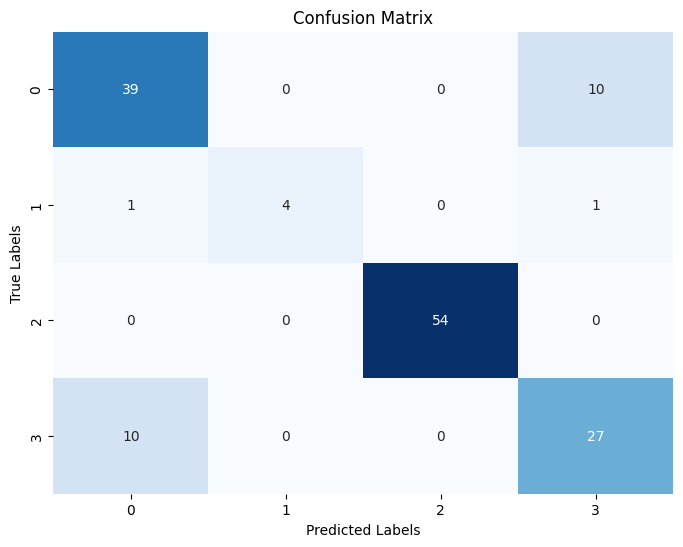

In [34]:
# Get predicted probabilities for each class
y_pred_probs = model.predict(X_val)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: {0.8528046142754145}
Recall: 0.8493150684931506
F1 Score: 0.8496305520963056


In [33]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Make predictions on the test data
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Compare predicted labels with true labels
correct_predictions = (predicted_classes == y_test)

# Calculate accuracy on the test data
test_accuracy = np.mean(correct_predictions)
print("Test Accuracy:", test_accuracy)


5/5 [==============================] - 1s 111ms/step - loss: 0.6449 - accuracy: 0.8425
Test Loss: 0.6449029445648193
Test Accuracy: 0.8424657583236694
5/5 [==============================] - 1s 97ms/step
Test Accuracy: 0.8424657534246576
